In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
runDir = "E:\Programming\Python\MJ\Projects\Population growth and markets\Population Data US"

if os.getcwd() != runDir:
    os.chdir(runDir)
files = os.listdir(runDir)
d = {}  # dictionary that will hold them

for file_name in files:  # loop over files
    print(file_name)
    # read csv into a dataframe and add it to dict with file_name as it key
    d[file_name[0:4]] = pd.read_excel(file_name,
                                 names=['Age', 'Total Population'], dtype={'Age': str, 'Total Population': int},
                                 usecols="A:B", skiprows=8, skipfooter=15,sheet_name=None)

1900 - 1909.xls
1910 - 1919.xls
1920 - 1929.xls
1930 - 1939.xls
1940 - 1949.xls
1950 - 1959.xls
1960 - 1969.xls
1970 - 1979.xls


In [3]:
mydict = {}
for key in ['0', '1', '2', '3', '4']:
    mydict[key] = 'Under 5 years'
for key in ['5', '6', '7', '8', '9']:
    mydict[key] = '5 to 9 years'
for key in ['10', '11', '12', '13', '14']:
    mydict[key] = '10 to 14 years'
for key in ['15', '16', '17', '18', '19']:
    mydict[key] = '15 to 19 years'
for key in ['20', '21', '22', '23', '24']:
    mydict[key] = '20 to 24 years'
for key in ['25', '26', '27', '28', '29']:
    mydict[key] = '25 to 29 years'
for key in ['30', '31', '32', '33', '34']:
    mydict[key] = '30 to 34 years'
for key in ['30', '31', '32', '33', '34']:
    mydict[key] = '30 to 34 years'
for key in ['35', '36', '37', '38', '39']:
    mydict[key] = '35 to 39 years'
for key in ['40', '41', '42', '43', '44']:
    mydict[key] = '40 to 44 years'
for key in ['45', '46', '47', '48', '49']:
    mydict[key] = '45 to 49 years'
for key in ['50', '51', '52', '53', '54']:
    mydict[key] = '50 to 54 years'
for key in ['55', '56', '57', '58', '59']:
    mydict[key] = '55 to 59 years'
for key in ['60', '61', '62', '63', '64']:
    mydict[key] = '60 to 64 years'
for key in ['65', '66', '67', '68', '69']:
    mydict[key] = '65 to 69 years'
for key in ['70', '71', '72', '73', '74']:
    mydict[key] = '70 to 74 years'
for key in ['75', '76', '77', '78', '79']:
    mydict[key] = '75 to 79 years'
for key in ['80', '81', '82', '83', '84']:
    mydict[key] = '80 to 84 years'
for key in ['85+']:
    mydict[key] = '85 years and above'

In [4]:
df = {}
for keys in d:
    for k in d[keys]:
        df[k]= d[keys].get(k)
        df[k].Age = df[k].Age.map(mydict)
        df[k] = df[k].groupby('Age', as_index=False)['Total Population'].sum()    

In [5]:
dfMO = {}
for i in range (1900,1980):
    a = np.array(df[str(i)].Age)
    b = np.array(df[str(i)]['Total Population'])
    totMpop = b[(a == '40 to 44 years') | (a == '45 to 49 years')].sum()
    totOpop = b[(a == '60 to 64 years') | (a == '65 to 69 years')].sum()
    MO = totMpop/totOpop
    dfMO[str(i)] = pd.DataFrame(np.array([[MO, str(i)]]),columns=['M/O Ratio', 'Year'])

In [6]:
dfMOT = dfMO['1900']
for i in range(1901,1980):
    dfMOT = pd.concat([dfMOT, dfMO[str(i)]])

In [7]:
dfMOT

,M/O Ratio,Year
0,2.489402697495183,1900
0,2.490276035131744,1901
0,2.49402390438247,1902
0,2.494456098291879,1903
0,2.493559718969555,1904
...,...,...
0,1.3108627101426733,1975
0,1.280504544900771,1976
0,1.2561715176077515,1977
0,1.2394844924130202,1978


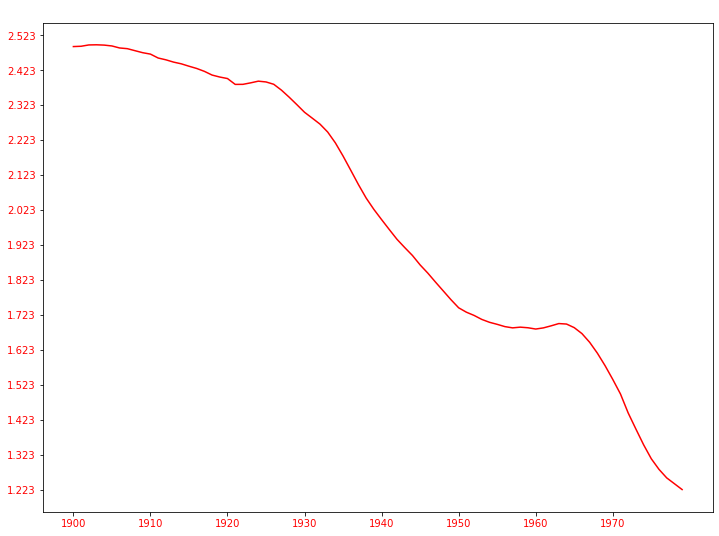

In [25]:
c = np.array(dfMOT['Year'])
c = c.astype(int)
d = np.array(dfMOT['M/O Ratio'])
d = d.astype(float)
plt.figure(figsize=(12,9))
plt.yticks(np.arange(min(d), max(d) + 0.1, 0.1))
plt.xticks(np.arange(min(c), max(c) + 1, 10))
plt.title("M/O Ratio from 1900 to 1979",color='w')
           
[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]
plt.plot(c,d,'r')
plt.savefig('MO.png')
plt.show()
